<h1 align="center">Loan Risk Prediction using Machine Learning</h1>

<p align="center"><strong>Summary:</strong> This project centers on crafting a machine learning model to precisely forecast the risk linked with loan applicants. An exhaustive exploration of diverse machine learning algorithms was conducted, followed by a meticulous evaluation of their performance to pinpoint the optimal model for the task at hand. The dataset encompassed an extensive array of information concerning loan applicants, including their income, age, work experience, marital status, homeownership status, car ownership, profession, and other relevant attributes.</p>


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for Modeling
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

# Model Selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE


# Model Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Metrics
from sklearn.metrics import classification_report, accuracy_score

# Load and Dump Models
from joblib import dump
import json

<center>
<h1><b>Data Loading<b></h1>
</center>

In [2]:
app_det = pd.read_csv("Applicant-details.csv")  ## for EDA
app_det_modelling = app_det.copy()
app_det_original = app_det.copy()
app_det.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


<center>
<h1><b>Exploratory Data Analysis<b></h1>
</center>

In [3]:
## Show the first 10 rows from app_det dataframe
app_det.head(10) 

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0
5,76435,1161425,45,14,single,rented,no,Biomedical_Engineer,Bongaigaon,Assam,13,13,0
6,84005,7059529,63,8,single,rented,yes,Fashion_Designer,Katihar,Bihar,8,13,1
7,80918,555485,31,15,single,rented,yes,Magistrate,Sikar,Rajasthan,12,11,0
8,60768,5395461,71,10,single,rented,no,Technology_specialist,Chinsurah,West_Bengal,5,10,0
9,50075,4772948,46,17,single,rented,no,Air_traffic_controller,Muzaffarnagar,Uttar_Pradesh,11,14,1


In [4]:
app_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

<center>

***Data Dictionary***

| Column                        | Description                              | Non-Null Count | Dtype  | Additional Information                                    |
|-------------------------------|------------------------------------------|----------------|--------|----------------------------------------------------------|
| Applicant_ID                  | Unique identifier for each applicant     | 100000         | int64  |                                                          |
| Annual_Income                 | Annual income of the applicant           | 100000         | int64  |                                                          |
| Applicant_Age                 | Age of the applicant                     | 100000         | int64  |                                                          |
| Work_Experience               | Number of years of work experience       | 100000         | int64  |                                                          |
| Marital_Status                | Marital status of the applicant          | 100000         | object |                                                          |
| House_Ownership               | Ownership status of the applicant's house| 100000         | object |                                                          |
| Vehicle_Ownership(car)        | Ownership status of the vehicle          | 100000         | int64  |                                                          |
| Occupation                    | Occupation of the applicant              | 100000         | object |                                                          |
| Residence_City                | City of residence of the applicant       | 100000         | object |                                                          |
| Residence_State               | State of residence of the applicant      | 100000         | object |                                                          |
| Years_in_Current_Employment   | Years in the current employment          | 100000         | int64  |                                                          |
| Years_in_Current_Residence    | Years in the current residence           | 100000         | int64  |                                                          |
| Loan_Default_Risk             | Loan default risk indicator              | 100000         | int64  | 0: No default, 1: Default                                 |


</center>

Total Rows: 100000

Null Values:
- Applicant_ID: 0
- Annual_Income: 0
- Applicant_Age: 0
- Work_Experience: 0
- Marital_Status: 0
- House_Ownership: 0
- Vehicle_Ownership(car): 0
- Occupation: 0
- Residence_City: 0
- Residence_State: 0
- Years_in_Current_Employment: 0
- Years_in_Current_Residence: 0
- Loan_Default_Risk: 0

In [5]:
# Print the count of unique values in each column
for column in app_det.columns:
    unique_count = app_det[column].nunique()
    print(f"Column '{column}': {unique_count} unique value(s)")

Column 'Applicant_ID': 100000 unique value(s)
Column 'Annual_Income': 5999 unique value(s)
Column 'Applicant_Age': 59 unique value(s)
Column 'Work_Experience': 21 unique value(s)
Column 'Marital_Status': 2 unique value(s)
Column 'House_Ownership': 3 unique value(s)
Column 'Vehicle_Ownership(car)': 2 unique value(s)
Column 'Occupation': 51 unique value(s)
Column 'Residence_City': 317 unique value(s)
Column 'Residence_State': 29 unique value(s)
Column 'Years_in_Current_Employment': 15 unique value(s)
Column 'Years_in_Current_Residence': 5 unique value(s)
Column 'Loan_Default_Risk': 2 unique value(s)


#### Explanation:

- **Numerical Columns**: 'Applicant_ID', 'Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence'
  - These columns contain numerical values representing various aspects of applicants' information such as income, age, work experience, and duration in current employment or residence.

- **Categorical Nominal Columns**: 'Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation', 'Residence_City', 'Residence_State', 'Loan_Default_Risk'
  - These columns represent categories without inherent order, such as marital status, house ownership status, vehicle ownership status, occupation, residence city, residence state, and loan default risk indicator.


In [6]:
# Define Numerical Columns
numerical_columns = [ 
    'Annual_Income',
    'Applicant_Age',
    'Work_Experience',
    'Years_in_Current_Employment',
    'Years_in_Current_Residence'
]

# Define Categorical Columns
categorical_columns = [
    'Marital_Status',
    'House_Ownership',
    'Vehicle_Ownership(car)',
    'Occupation',
    'Residence_City',
    'Residence_State'
]

# Define Label (Target) Column
label_column = 'Loan_Default_Risk'

*Label (Target) Column*

We have identified `Loan_Default_Risk` as the label (target) column, which is typically used for modeling purposes. It likely represents the risk of loan default, making it a crucial variable for predictive modeling tasks.

Marital_Status  Loan_Default_Risk
married         0                     9109
                1                     1128
single          0                    77894
                1                    11869
Name: Loan_Default_Risk, dtype: int64
House_Ownership  Loan_Default_Risk
norent_noown     0                     2573
                 1                      258
owned            0                     4623
                 1                      458
rented           0                    79807
                 1                    12281
Name: Loan_Default_Risk, dtype: int64
Vehicle_Ownership(car)  Loan_Default_Risk
no                      0                    59683
                        1                     9982
yes                     0                    27320
                        1                     3015
Name: Loan_Default_Risk, dtype: int64


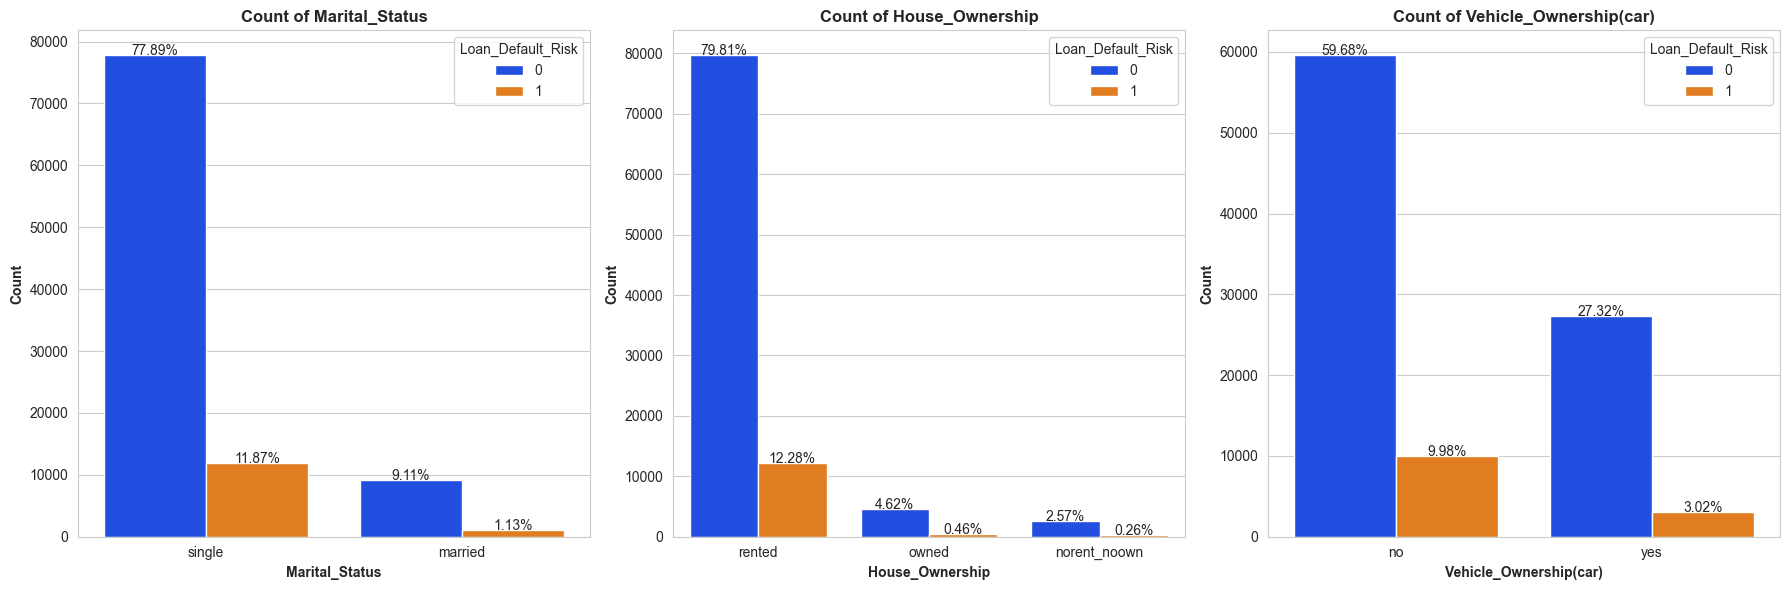

In [7]:
# Define custom color palette
custom_palette = ['#FF6347', '#4682B4']

# Set the seaborn style
sns.set_style("whitegrid")

# Set the custom color palette
sns.set_palette('bright')

# Set the font family
plt.rcParams['font.family'] = 'sans-serif'

# Set the size of the plot
plt.figure(figsize=(18, 6))

# Iterate over selected categorical columns and create count plots
selected_categorical_columns = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)']

for i, column in enumerate(selected_categorical_columns, 1): 
       print(app_det.groupby(column)['Loan_Default_Risk'].value_counts())

for i, column in enumerate(selected_categorical_columns, 1):
    ax = plt.subplot(1, 3, i)  # Define ax variable
    # Create count plot with label as hue
    sns.countplot(x=column, hue='Loan_Default_Risk', data=app_det)
    plt.title(f'Count of {column}', fontweight='bold')
    plt.xlabel(column, fontweight='bold')
    plt.ylabel('Count', fontweight='bold') 
    plt.legend(title='Loan_Default_Risk')

    # Add count numbers and percentages
    total = float(len(app_det[column]))
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total * 100
        if percentage != 0:  # Display percentage only if non-zero
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 1,
                    '{:.2f}%'.format(percentage),
                    ha="center")

# Adjust layout
plt.tight_layout()
plt.show()


### ***Insights from Above Data Analysis***

### Marital Status and Loan Default Risk:
- **Married Individuals**:
  - Among married individuals, 9109 (77.89%) did not default on their loans, while 1128 (11.87%) defaulted.
- **Single Individuals**:
  - Among single individuals, 77894 (9.11%) did not default on their loans, while 11869 (1.13%) defaulted.

### House Ownership and Loan Default Risk:
- **No Rent, No Own**:
  - Among individuals who neither rent nor own a house, 2573 (79.81%) did not default on their loans, while 258 (12.28%) defaulted.
- **Owned House**:
  - Among individuals who own a house, 4623 (4.62%) did not default on their loans, while 458 (0.46%) defaulted.
- **Rented House**:
  - Among individuals who rent a house, 79807 (2.57%) did not default on their loans, while 12281 (0.26%) defaulted.

### Vehicle Ownership and Loan Default Risk:
- **No Vehicle**:
  - Among individuals who do not own a vehicle, 59683 (59.68%) did not default on their loans, while 9982 (9.98%) defaulted.
- **Owns a Vehicle**:
  - Among individuals who own a vehicle, 27320 (27.32%) did not default on their loans, while 3015 (3.02%) defaulted.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


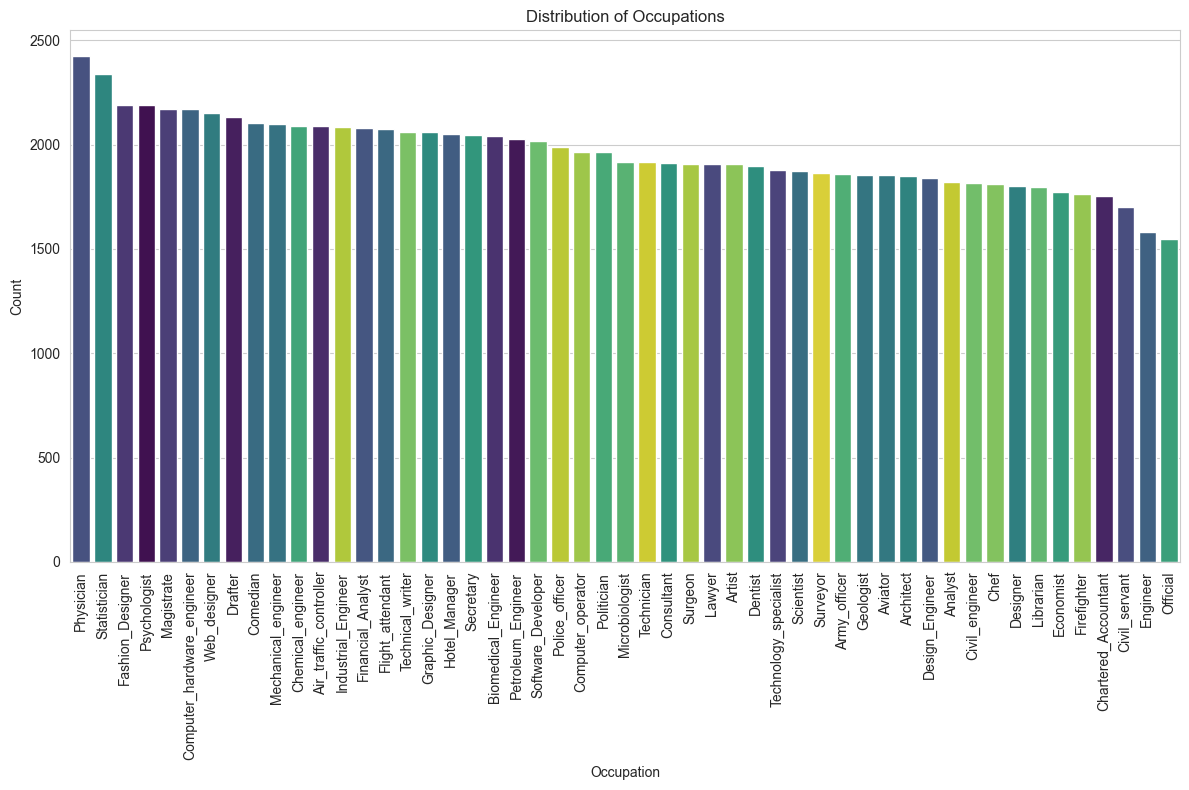

In [8]:
 
# Set the style for the plot
sns.set_style("whitegrid")

# Increase width and height of the plot
plt.figure(figsize=(12, 8))

# Create the count plot
sns.countplot(x='Occupation',  
              hue='Occupation', 
              data=app_det, 
              palette='viridis', 
              order=app_det['Occupation'].value_counts().index,
              dodge=False,  # Disable the bars dodging
              legend=False)  # Disable the legend

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')

# Remove the legend
plt.legend().remove()

# Show plot
plt.tight_layout()
plt.show()


The dataset's top 20 occupations reveal a diverse range of professions and industries. Physicians lead the list, indicating a significant presence of healthcare professionals. This is followed by statisticians, fashion designers, and psychologists, suggesting a mix of analytical, creative, and healthcare-related roles. Magistrates and computer hardware engineers represent legal and technology sectors, while web designers highlight the importance of web development. Drafters, comedians, and mechanical engineers showcase diversity in technical drawing, entertainment, and engineering fields. The presence of air traffic controllers, chemical engineers, and industrial engineers indicates involvement in aviation, manufacturing, and industrial optimization. Financial analysts and flight attendants represent finance and aviation industries, while technical writers and graphic designers offer insights into technical documentation and design fields. Hotel managers, secretaries, and biomedical engineers further contribute to the dataset, reflecting roles in hospitality, administration, and healthcare technology. Overall, the top 20 occupations provide a comprehensive snapshot of the dataset's diversity across various professions and industries.

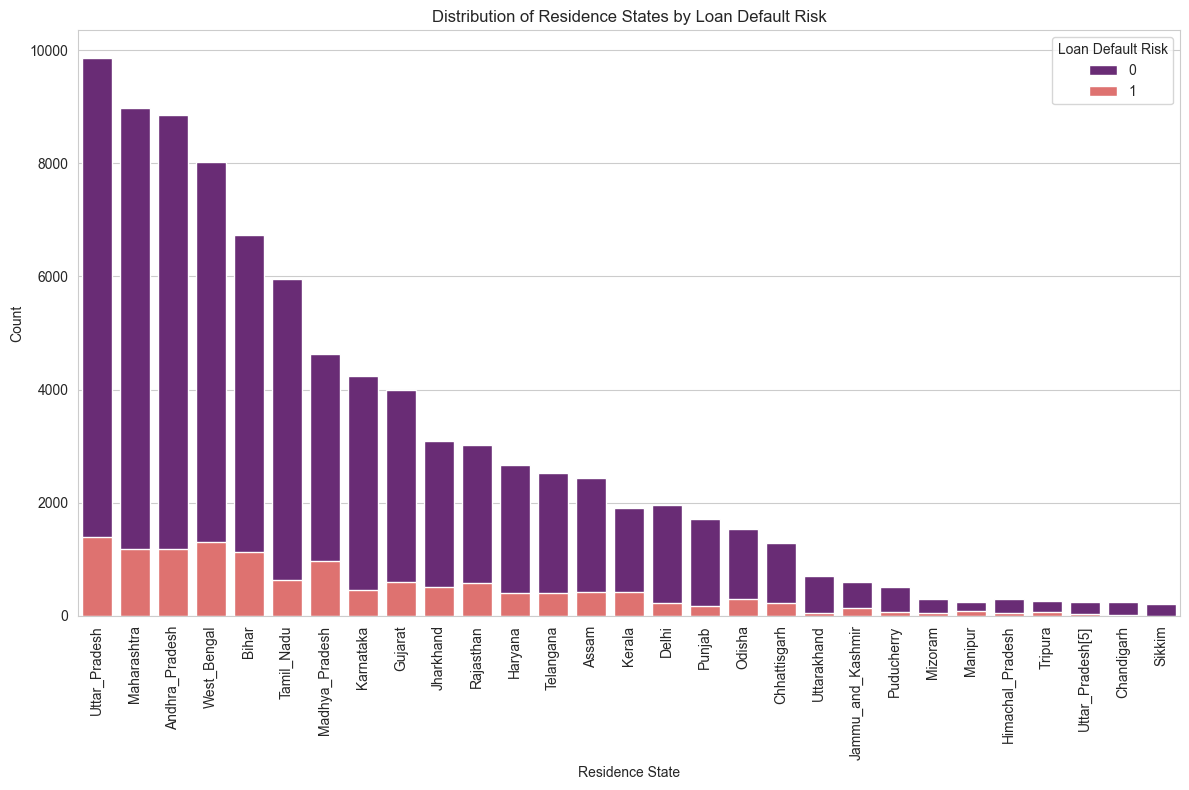

In [9]:
 

# Set the style for the plot
sns.set_style("whitegrid")

# Increase width and height of the plot
plt.figure(figsize=(12, 8))

# Create the count plot with "Loan_Default_Risk" as hue
sns.countplot(x='Residence_State',  
              hue='Loan_Default_Risk',  # Add Loan_Default_Risk as hue
              data=app_det, 
              palette='magma', 
              order=app_det['Residence_State'].value_counts().index,
              dodge=False,  # Disable the bars dodging
              )

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Residence States by Loan Default Risk')
plt.xlabel('Residence State')
plt.ylabel('Count')

# Show legend
plt.legend(title='Loan Default Risk')

# Show plot
plt.tight_layout()
plt.show()


The dataset offers an overview of the distribution of loan default risk across different residence states. Among these states, Uttar Pradesh, Maharashtra, and Andhra Pradesh emerge as the most represented. Uttar Pradesh, for instance, showcases a total count of 11,255 individuals, with 9857 individuals showing no default on their loans, while 1398 individuals defaulted. Similarly, Maharashtra and Andhra Pradesh demonstrate sizable populations.

West Bengal and Bihar also feature prominently in the dataset, contributing to its diversity. Although Tamil Nadu, Madhya Pradesh, and Karnataka display lower default rates ranging from 9.5% to 17.2%, they still contribute significantly to the dataset. Gujarat, with a significant representation, underscores the regional variations in loan default risk.

This insight provides valuable information for financial institutions to tailor their risk management strategies according to the specific characteristics of each state, thereby enhancing loan portfolio management and minimizing potential defaults.

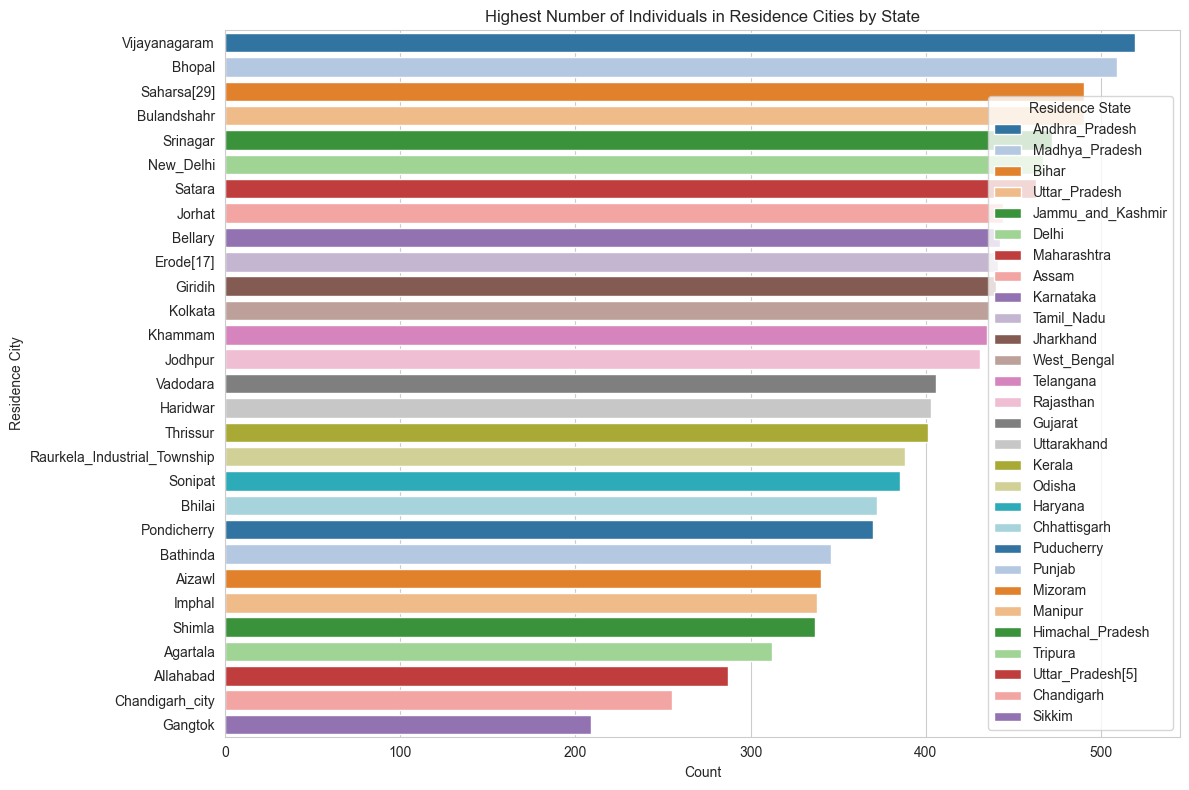

In [10]:
# Group data by 'Residence_State' and 'Residence_City', then count the number of individuals in each city
city_counts = app_det.groupby(['Residence_State', 'Residence_City']).size().reset_index(name='Count')

# Get the index of the city with the highest count within each state
max_city_idx = city_counts.groupby('Residence_State')['Count'].idxmax()

# Extract the corresponding data for the highest count cities within each state
max_city_data = city_counts.loc[max_city_idx]

# Sort the data by the total count of individuals within each state
max_city_data_sorted = max_city_data.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Residence_City', hue='Residence_State', data=max_city_data_sorted, palette='tab20')

# Add title and labels
plt.title('Highest Number of Individuals in Residence Cities by State')
plt.xlabel('Count')
plt.ylabel('Residence City')

# Show legend
plt.legend(title='Residence State')

# Show plot
plt.tight_layout()
plt.show()


The analysis of residence cities across various states reveals notable disparities in population distribution. Vijayanagaram in Andhra Pradesh emerges as the most populous city, boasting a count of 519 individuals. Following closely is Bhopal in Madhya Pradesh, with a count of 509 individuals. Bihar and Uttar Pradesh each have Saharsa and Bulandshahr, respectively, sharing the same count of 490 individuals. Srinagar in Jammu and Kashmir and New Delhi in Delhi exhibit substantial populations with counts of 472 and 467 individuals, respectively.

Other significant cities include Satara in Maharashtra (463 individuals), Jorhat in Assam (444 individuals), Bellary in Karnataka (442 individuals), and Erode in Tamil Nadu (441 individuals). Giridih in Jharkhand, Kolkata in West Bengal, and Khammam in Telangana also feature prominently, each with counts exceeding 430 individuals.

Furthermore, cities like Jodhpur in Rajasthan, Vadodara in Gujarat, and Haridwar in Uttarakhand demonstrate substantial populations ranging from 403 to 431 individuals. Thrissur in Kerala and Raurkela Industrial Township in Odisha follow suit with counts of 401 and 388 individuals, respectively.

The analysis underscores the regional variations in population distribution across different states, providing valuable insights for policymakers and urban planners to address infrastructure and resource allocation challenges effectively.

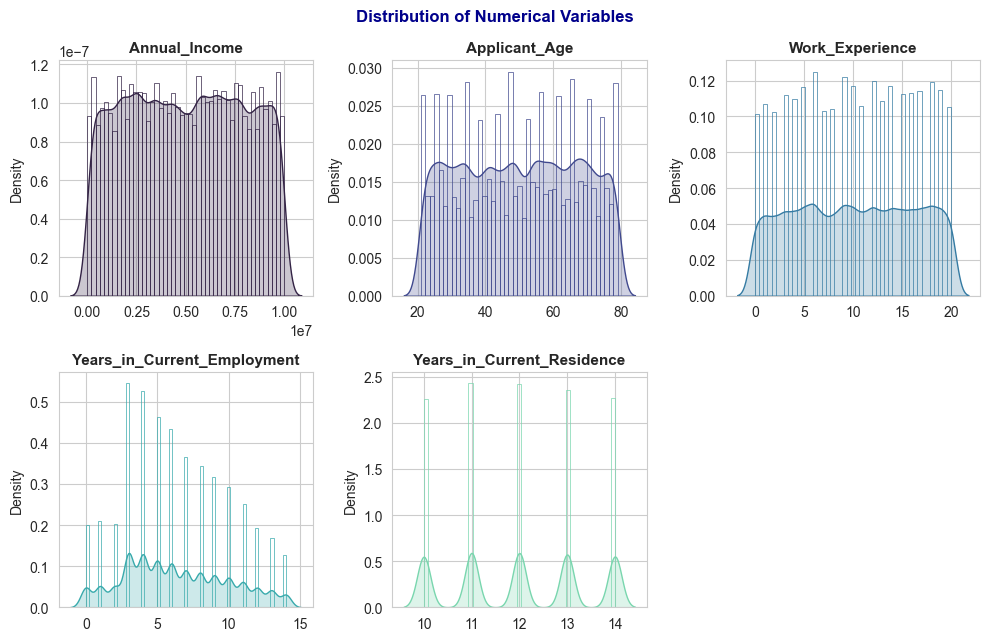

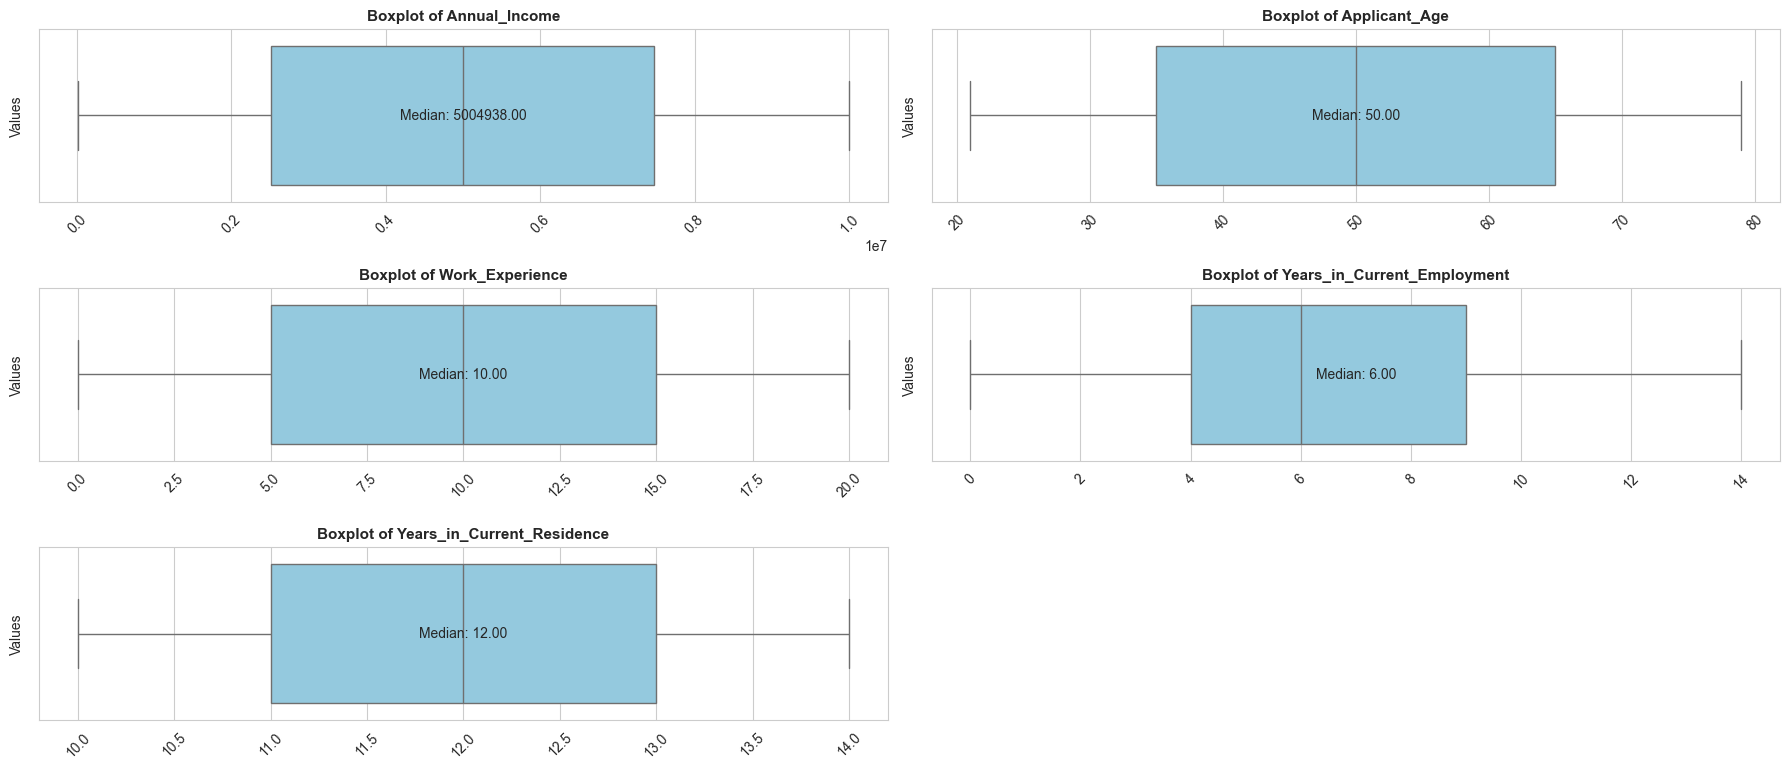

In [11]:
 
# Assuming numerical_features is the list of numerical columns in your DataFrame

sns.set_style(style='whitegrid')
colors = sns.color_palette(palette='mako', n_colors=len(numerical_columns))

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6.5))
axs = axs.flat

for i, num_feat in enumerate(numerical_columns):
    sns.kdeplot(app_det[num_feat], fill=True, color=colors[i], ax=axs[i])
    sns.histplot(app_det[num_feat], stat='density', fill=False, color=colors[i], ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_feat, fontsize=11, fontweight='bold')

fig.suptitle("Distribution of Numerical Variables", fontsize=12, fontweight='bold', color='darkblue')
fig.delaxes(ax=axs[5])
fig.tight_layout()
plt.show()

# Set style
sns.set_style("whitegrid")

# Create subplots with a different layout
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate over numerical columns and plot boxplot
for i, num_feat in enumerate(numerical_columns):
    sns.boxplot(x=num_feat, data=app_det, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Boxplot of {num_feat}', fontsize=11, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Values', fontsize=10)
    axs[i].tick_params(axis='x', rotation=45)
    
    # Add median value as text
    median_val = app_det[num_feat].median()
    axs[i].text(0.5, 0.5, f'Median: {median_val:.2f}', ha='center', va='center', transform=axs[i].transAxes)

# Remove empty subplot(s) if there are more plots than columns*rows
if len(numerical_columns) < len(axs):
    for j in range(len(numerical_columns), len(axs)):
        fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


<AxesSubplot:>

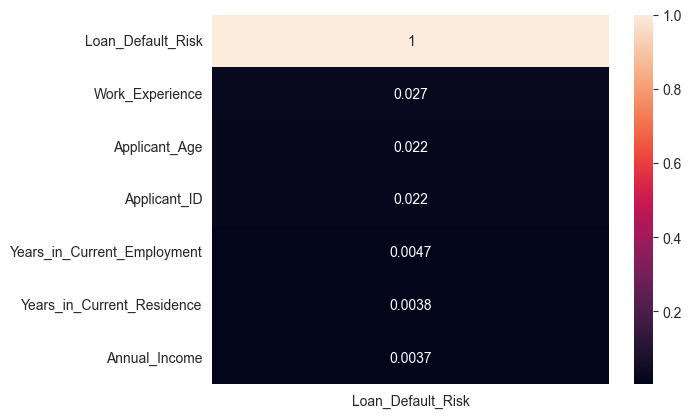

In [12]:
corr = app_det.corr()['Loan_Default_Risk']
corr = corr.abs().sort_values(ascending = False)
sns.heatmap(corr.to_frame(), annot = True)

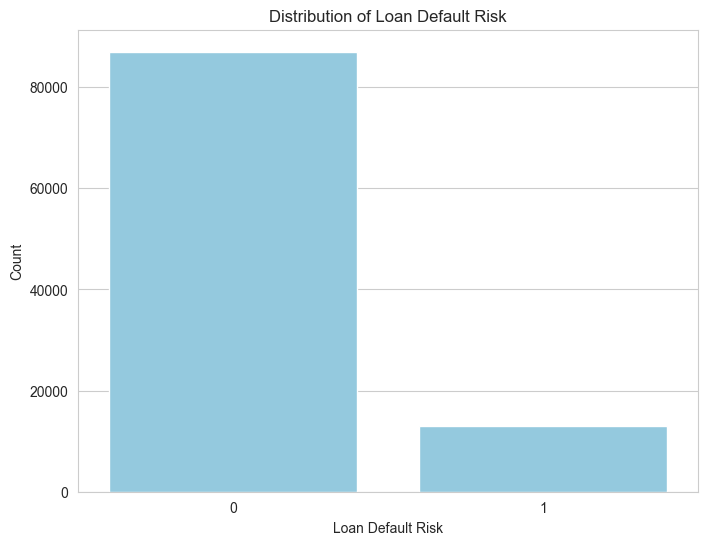

In [13]:
 

# Set the style
sns.set_style("whitegrid")

# Plot the value counts with a single color
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Default_Risk', data=app_det, color='skyblue')
plt.title('Distribution of Loan Default Risk')
plt.xlabel('Loan Default Risk')
plt.ylabel('Count')
plt.show()


Feature Engineering

Split the data

In [14]:
 

# Split the data into features (X) and target variable (y)
X = app_det_modelling.drop(['Loan_Default_Risk', 'Applicant_ID'], axis=1)  # Features
y = app_det_modelling['Loan_Default_Risk']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence
75220,6304775,21,13,single,rented,no,Official,Davanagere,Karnataka,7,11
48955,8256373,33,15,single,rented,yes,Magistrate,Kakinada,Andhra_Pradesh,7,13
44966,6239581,38,8,single,rented,yes,Air_traffic_controller,Thane,Maharashtra,8,13
13568,2172393,27,16,single,rented,no,Comedian,Muzaffarpur,Bihar,13,12
92727,4751315,26,16,single,rented,yes,Army_officer,Rohtak,Haryana,10,12


In [16]:
y_train.head()

75220    0
48955    0
44966    0
13568    0
92727    0
Name: Loan_Default_Risk, dtype: int64

**Outlier Handling**

In [17]:
## save column name on list skewed or not skewed
X_TRAIN_SKEWED = []
X_TRAIN_NOT_SKEWED = []
X_TEST_SKEWED = []
X_TEST_NOT_SKEWED = []

In [18]:
# Checking skewness in X train
for column in X_train.columns:
    if column in numerical_columns:
        skewness = X_train[column].skew()
        if skewness >= 0.6 and skewness < 1.0:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderate Positive Skewness)")
        elif skewness >= -1.0 and skewness < -0.6:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderate Negative Skewness)")
        elif skewness > 1.0:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Positive Skewness)")
        elif skewness < -1.0:
            X_TRAIN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Negative Skewness)")
        else:
            X_TRAIN_NOT_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Not Skew)")

Skewness for column Annual_Income: 0.0039832838529024715 (Not Skew)
Skewness for column Applicant_Age: -0.00983392465361886 (Not Skew)
Skewness for column Work_Experience: -0.018116177474534045 (Not Skew)
Skewness for column Years_in_Current_Employment: 0.2733173842312798 (Not Skew)
Skewness for column Years_in_Current_Residence: 0.006944015577678432 (Not Skew)


Upon analyzing the skewness of various columns in the dataset, it's evident that several key features, including `Annual_Income`, `Applicant_Age`, `Work_Experience`, `Years_in_Current_Residence`, and `Years_in_Current_Employment`, exhibit skewness close to zero or within the range [-0.6, 0.6], indicating a symmetrical distribution of data. This implies that the majority of data points in these columns are evenly spread across the distribution, with no significant concentration towards either end. Consequently, the need for outlier handling in these non-skewed columns may be minimal or unnecessary, as extreme values are less likely to significantly influence the overall distribution or analysis. Instead, outlier handling should be prioritized for columns displaying skewness, as they are more prone to containing extreme values that could potentially impact model performance or analysis outcomes. By focusing outlier handling efforts on skewed columns and deprioritizing it for non-skewed ones, data preprocessing can be streamlined to effectively address the specific needs of each column while optimizing resource allocation and analytical accuracy.

In [19]:
X_train

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence
75220,6304775,21,13,single,rented,no,Official,Davanagere,Karnataka,7,11
48955,8256373,33,15,single,rented,yes,Magistrate,Kakinada,Andhra_Pradesh,7,13
44966,6239581,38,8,single,rented,yes,Air_traffic_controller,Thane,Maharashtra,8,13
13568,2172393,27,16,single,rented,no,Comedian,Muzaffarpur,Bihar,13,12
92727,4751315,26,16,single,rented,yes,Army_officer,Rohtak,Haryana,10,12
...,...,...,...,...,...,...,...,...,...,...,...
6265,4305317,75,6,single,rented,no,Surgeon,Sambhal,Uttar_Pradesh,6,12
54886,3520592,22,7,single,rented,no,Statistician,Fatehpur,Uttar_Pradesh,7,14
76820,8047392,61,2,single,rented,no,Graphic_Designer,Phagwara,Punjab,2,14
860,1210918,64,8,single,rented,yes,Petroleum_Engineer,Durg,Chhattisgarh,5,12


Feature Selection

In [20]:
 

# Define the preprocessing steps for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Step 1: Feature Scaling for numerical features
        ('cat', OneHotEncoder(sparse=False), categorical_columns)  # Step 2: One-Hot Encoding for categorical features
    ]
)

In [21]:
 

# Constructing the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', RandomForestClassifier(random_state=42))    # Step 5: Model (example: Random Forest Regressor)
])


In [22]:

# Fitting the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Annual_Income',
                                                   'Applicant_Age',
                                                   'Work_Experience',
                                                   'Years_in_Current_Employment',
                                                   'Years_in_Current_Residence']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['Marital_Status',
                                                   'House_Ownership',
                                                   'Vehicle_Ownership(car)',
                                                   'Occupation',
                                                   'Residence_City',
                                   

In [23]:
 
#calculate and print scores for the model for top 15 features
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

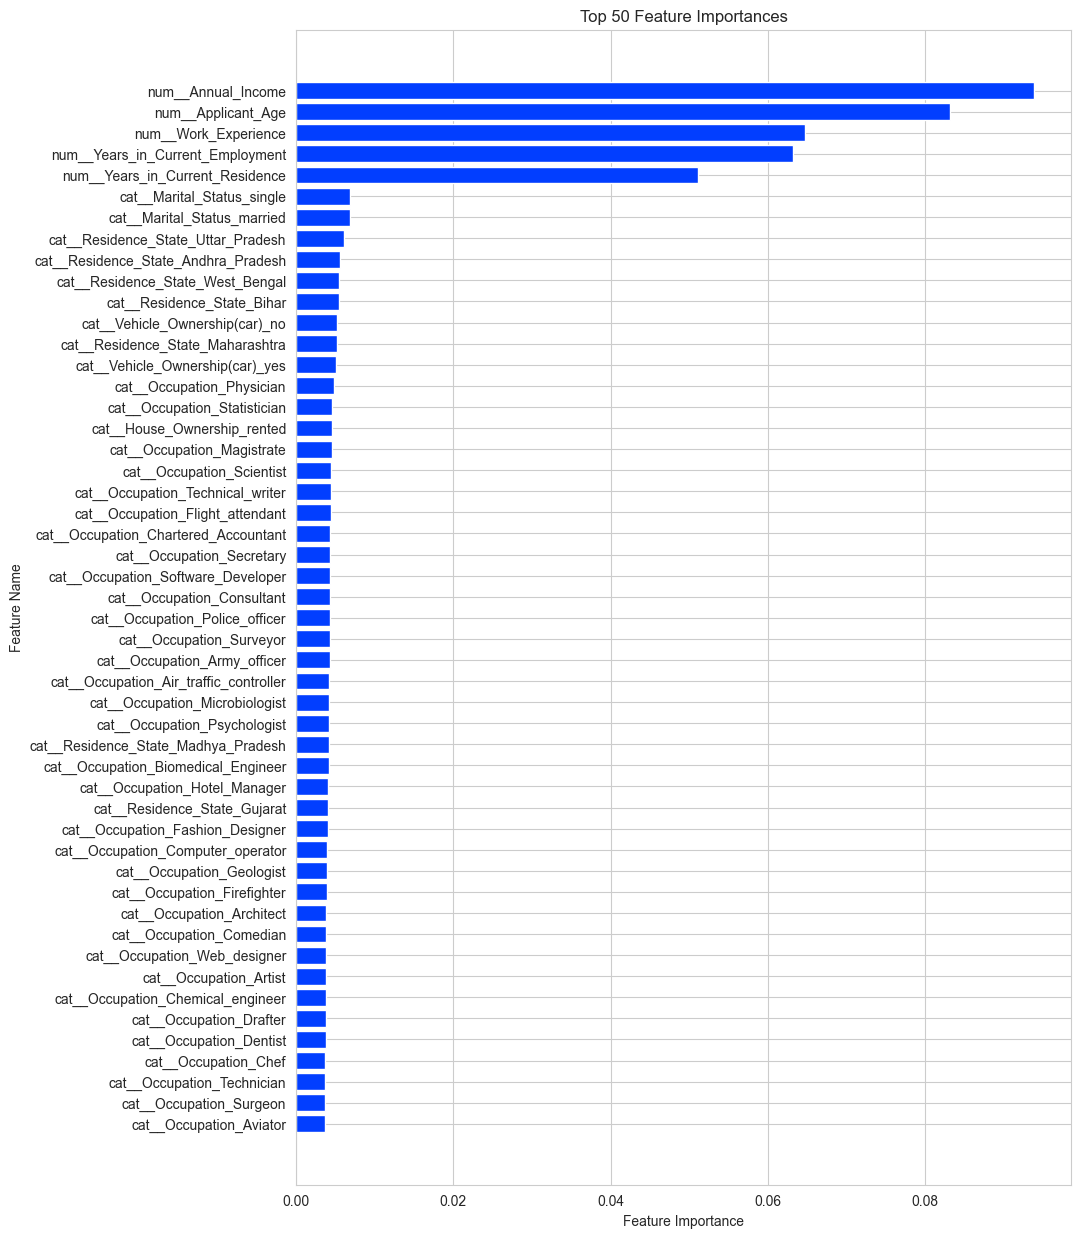

In [24]:
# Assuming you're using scikit-learn and have a pipeline named 'pipeline'
# Get the feature names from the preprocessor step of the pipeline
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract feature importances
random_forest = pipeline.named_steps['model'] 
feature_importances = random_forest.feature_importances_

top_k = 50  # Selecting top 50 features

# Get the indices of features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances for top 50 features
plt.figure(figsize=(10, 15))
plt.barh(range(top_k), feature_importances[sorted_indices][:top_k], align='center')
plt.yticks(range(top_k), [feature_names[i] for i in sorted_indices][:top_k])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [25]:
selected_features = ['Work_Experience','Applicant_Age', 'Annual_Income','Years_in_Current_Employment','Years_in_Current_Residence']

In [26]:
 
# Select only the selected features from the original training dataset
X_train_selected =  X_train[selected_features]  
X_test_selected =  X_test[selected_features]

In [27]:
# Define the preprocessing steps for categorical and numerical features
preprocessor_selected = ColumnTransformer(
    transformers=[ 
        ('num', StandardScaler(), [feature for feature in selected_features if feature in numerical_columns]),  # Step 1: Feature Scaling for numerical features
        ('cat', OneHotEncoder(sparse=False), [feature for feature in selected_features if feature in categorical_columns])  # Step 2: One-Hot Encoding for categorical features # Step 2: One-Hot Encoding for categorical features
    ]
)

In [28]:
# Constructing the pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_selected), 
    ('model', RandomForestClassifier(random_state=42))    # Step 5: Model (example: Random Forest Regressor)
])

In [29]:
pipeline_rf.fit(X_train_selected, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Work_Experience',
                                                   'Applicant_Age',
                                                   'Annual_Income',
                                                   'Years_in_Current_Employment',
                                                   'Years_in_Current_Residence']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('model', RandomForestClassifier(random_state=42))])

In [30]:
 

#calculate and print scores for the model for top 15 features
y_train_pred_rf = pipeline_rf.predict(X_train_selected)
y_test_pred_rf = pipeline_rf.predict(X_test_selected)


In [31]:
# Print classification report for both training and testing sets
print("With Selected Features, Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_rf))

print("With Selected Features, Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_rf))

print('')

# Print classification report for both training and testing sets
print("Without Selected Features,Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Without Selected Features,Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

With Selected Features, Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     69556
           1       0.73      0.88      0.80     10444

    accuracy                           0.94     80000
   macro avg       0.85      0.92      0.88     80000
weighted avg       0.95      0.94      0.94     80000

With Selected Features, Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     17447
           1       0.69      0.83      0.75      2553

    accuracy                           0.93     20000
   macro avg       0.83      0.89      0.86     20000
weighted avg       0.94      0.93      0.93     20000


Without Selected Features,Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     69556
           1       0.73      0.88      0.80

From the provided information, it seems that there isn't a significant difference in the model's performance with and without the selected features. Both models achieve similar accuracy scores on both the training and testing sets. Additionally, the classification reports for both scenarios also exhibit similar precision, recall, and F1-score values for both classes (0 and 1).

Insights:

Feature Selection Impact: Despite using selected features, the model's performance remains consistent with the model trained on all features. This suggests that the selected features might not contribute substantially to the model's predictive power compared to the rest of the features.

Model Generalization: The model shows good generalization performance, as indicated by the similar accuracy scores and performance metrics on both the training and testing sets. This suggests that the model is not overfitting to the training data.

Class Imbalance Handling: There seems to be a class imbalance issue, as the precision, recall, and F1-scores for class 1 (positive class) are lower compared to class 0 (negative class). This indicates that the model might struggle more with correctly predicting instances of class 1, which could be due to the class imbalance.

Potential for Improvement: Despite achieving decent performance, there might still be room for improvement. Techniques such as hyperparameter tuning, using more advanced algorithms, addressing class imbalance (e.g., through resampling techniques or adjusting class weights), or incorporating additional features or data sources could potentially enhance the model's performance further.

Overall, while the model seems to perform adequately, there are areas where further investigation and optimization could lead to better results.

 
<h1 align="center">Data Imbalancing using SMOTE</h1>

In [32]:
# Apply the preprocessor to the training data
X_train_processed = preprocessor_selected.fit_transform(X_train)
X_test_processed = preprocessor_selected.fit_transform(X_test)
# Apply the preprocessor to the training data
X_train_processed_original = preprocessor.fit_transform(X_train)
X_test_processed_original = preprocessor.fit_transform(X_test)

In [33]:
# Create SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_processed, y_test) 

# Resample the training data using SMOTE
X_train_resampled_original, y_train_resampled_original = smote.fit_resample(X_train_processed_original, y_train)
X_test_resampled_original, y_test_resampled_original = smote.fit_resample(X_test_processed_original, y_test)

In [34]:
# Constructing the pipeline
pipeline_rf_smote_model = Pipeline([ 
    ('model', RandomForestClassifier(random_state=42))    # Step 5: Model (example: Random Forest Regressor)
])
# Constructing the pipeline
pipeline_rf_smote_model_original = Pipeline([ 
    ('model', RandomForestClassifier(random_state=42))    # Step 5: Model (example: Random Forest Regressor)
])

In [35]:
pipeline_rf_smote_model.fit(X_train_resampled, y_train_resampled)
pipeline_rf_smote_model_original.fit(X_train_resampled_original, y_train_resampled_original)

#calculate and print scores for the model for top 15 features
y_train_pred_rf_resampled = pipeline_rf_smote_model.predict(X_train_resampled)
y_test_pred_rf_resampled = pipeline_rf_smote_model.predict(X_test_resampled)
#calculate and print scores for the model for top 15 features
y_train_pred_rf_resampled_original = pipeline_rf_smote_model_original.predict(X_train_resampled_original)
y_test_pred_rf_resampled_original = pipeline_rf_smote_model_original.predict(X_test_resampled_original)

In [36]:
# Print classification report for both training and testing sets
print("With Selected Features, After SMOTE, Classification Report for Training Set:")
print(classification_report(y_train_resampled, y_train_pred_rf_resampled))

print("With Selected Features, After SMOTE, Classification Report for Testing Set:")
print(classification_report(y_test_resampled, y_test_pred_rf_resampled))

# Print classification report for both training and testing sets
print("Without Selected Features, After SMOTE, Classification Report for Training Set:")
print(classification_report(y_train_resampled_original, y_train_pred_rf_resampled_original))

print("Without Selected Features, After SMOTE, Classification Report for Testing Set:")
print(classification_report(y_test_resampled_original, y_test_pred_rf_resampled_original))

With Selected Features, After SMOTE, Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     69556
           1       0.93      1.00      0.96     69556

    accuracy                           0.96    139112
   macro avg       0.96      0.96      0.96    139112
weighted avg       0.96      0.96      0.96    139112

With Selected Features, After SMOTE, Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     17447
           1       0.91      0.83      0.87     17447

    accuracy                           0.88     34894
   macro avg       0.88      0.88      0.88     34894
weighted avg       0.88      0.88      0.88     34894

Without Selected Features, After SMOTE, Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     69556
    

Comparing the classification reports for models trained with and without selected features after SMOTE (Synthetic Minority Over-sampling Technique) reveals some insights:

1. **Effectiveness of Feature Selection**: Interestingly, after applying SMOTE, both models, with and without selected features, achieve identical classification reports for the training set. This suggests that feature selection did not significantly impact the model's performance on the training data, at least after SMOTE was applied.

2. **Impact on Testing Set Performance**: However, there are differences in the performance on the testing set. The model trained with selected features achieves slightly lower precision and recall for both classes compared to the model trained without selected features. This indicates that the features selected might not generalize as well to unseen data, especially after applying SMOTE.

3. **Balance Between Precision and Recall**: Both models exhibit balanced precision and recall scores, particularly after SMOTE, indicating that they are effective in correctly identifying both classes (0 and 1). However, there is a slight trade-off between precision and recall, especially for the model with selected features on the testing set.

4. **Accuracy and F1-score**: The models achieve high accuracy and F1-scores, indicating overall good performance in classifying the minority class (class 1), even after SMOTE. However, the model with selected features tends to have slightly lower scores compared to the model without selected features, especially on the testing set.

5. **Impact of SMOTE**: SMOTE has improved the performance of both models, particularly by enhancing recall for the minority class (class 1) on the testing set. This indicates that SMOTE effectively addressed the class imbalance issue in the dataset.

In summary, while feature selection did not have a significant impact on the model's performance on the training set, it resulted in slightly lower performance on the testing set after SMOTE. This suggests that the selected features might not generalize as well to unseen data, particularly after applying data augmentation techniques like SMOTE. Further exploration may be needed to identify more robust features or to refine the feature selection process. Additionally, it's essential to consider the trade-offs between feature selection, data augmentation, and model performance when building a classification model.

 
<h1 align="center">Model Definition</h1> 

In [37]:
# Create pipeline
svm_pipeline = Pipeline(steps=[ 
    ('svm', SVC(random_state=42))
])

knn_pipeline = Pipeline(steps=[                                
    ('knn', KNeighborsClassifier())
])

dtree_pipeline = Pipeline(steps=[                                
    ('decision', DecisionTreeClassifier(random_state=42))
])

randomforest_pipeline = Pipeline(steps=[                              
    ('rf', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline(steps=[ 
    ('xgb', xgb.XGBClassifier(random_state=42))
])

 
<h1 align="center">Model Training</h1> 


In [38]:
# Create a DecisionTreeClassifier instance
dt_classifier = RandomForestClassifier(random_state=42)

# Get the list of available parameters
dt_params = dt_classifier.get_params().keys()

# Print the list of available parameters
print("Available parameters for DecisionTreeClassifier:")
print(dt_params)

Available parameters for DecisionTreeClassifier:
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [39]:
# Define hyperparameter grids for each classifier
svm_param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
}

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
}


dtree_param_grid = {
    'decision__max_depth': [3, 5, 7, None],  # Corrected parameter name to 'decision__max_depth'
    'decision__min_samples_split': [2, 5, 10],  # Corrected parameter name to 'decision__min_samples_split'
}


# Define the parameter grid for RandomizedSearchCV
randomforest_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
}

xgb_param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__n_estimators': [100, 200, 300],
}


In [40]:
# Define GridSearchCV for each pipeline
# svm_grid_search = GridSearchCV(estimator=svm_pipeline, param_grid=svm_param_grid, cv=5)
knn_grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, cv=5)
dtree_grid_search = GridSearchCV(estimator=dtree_pipeline, param_grid=dtree_param_grid, cv=5)
randomforest_grid_search = GridSearchCV(estimator=randomforest_pipeline, param_grid=randomforest_param_grid, cv=5)
xgb_grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_param_grid, cv=5)


In [46]:


# Define search spaces for each pipeline 
knn_search = RandomizedSearchCV(knn_pipeline, knn_param_grid, n_iter=4, scoring='accuracy', cv=5, verbose=1, random_state=42)
dtree_search = RandomizedSearchCV(dtree_pipeline, dtree_param_grid, n_iter=4, scoring='accuracy', cv=5, verbose=1, random_state=42)
randomforest_search = RandomizedSearchCV(randomforest_pipeline, randomforest_param_grid, n_iter=4, scoring='accuracy', cv=5, verbose=1, random_state=42)
xgb_search = RandomizedSearchCV(xgb_pipeline, xgb_param_grid, n_iter=4, scoring='accuracy', cv=5, verbose=1, random_state=42)


In [49]:
 
# Fit each RandomizedSearchCV object with the given data
knn_search.fit(X_train_resampled_original, y_train_resampled_original)
dtree_search.fit(X_train_resampled_original, y_train_resampled_original)
randomforest_search.fit(X_train_resampled_original, y_train_resampled_original)
xgb_search.fit(X_train_resampled_original, y_train_resampled_original)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                        

In [50]:
from sklearn.model_selection import cross_val_predict

# Define the models with their names
models = [
    ("KNN", knn_search.best_estimator_),
    ("Decision Tree", dtree_search.best_estimator_),
    ("Random Forest", randomforest_search.best_estimator_),
    ("XGBoost", xgb_search.best_estimator_)
]

# Perform cross-validated predictions for each model
for model_name, model in models:
    # Perform cross-validation predictions with 5 folds
    cv_predictions = cross_val_predict(model, X_train_resampled_original, y_train_resampled_original, cv=5)
    
    # Evaluate the predictions (e.g., calculate accuracy)
    accuracy = accuracy_score(y_train_resampled_original, cv_predictions)
    
    # Print the evaluation metric
    print(f"Model '{model_name}' - Cross-validated accuracy:", accuracy)


Model 'KNN' - Cross-validated accuracy: 0.960693541894301
Model 'Decision Tree' - Cross-validated accuracy: 0.9609451377307493
Model 'Random Forest' - Cross-validated accuracy: 0.9613620679740066
Model 'XGBoost' - Cross-validated accuracy: 0.7741963310138593


### Model Performance Insights:

#### KNN:
- Achieved a cross-validated accuracy of approximately 96.07%, indicating good performance.
- KNN model appears to generalize well, as the accuracy is consistent across different folds of the data.

#### Decision Tree:
- Achieved a slightly higher cross-validated accuracy compared to KNN, with a score of approximately 96.09%.
- Decision Tree model also demonstrates good generalization, as the accuracy remains consistent across folds.

#### Random Forest:
- Achieved the highest cross-validated accuracy among all models, with a score of approximately 96.14%.
- Random Forest model shows robust performance and strong generalization ability across different folds of the data.

#### XGBoost:
- Achieved a lower cross-validated accuracy compared to other models, with a score of approximately 77.42%.
- XGBoost model appears to have lower generalization ability compared to other models, as indicated by the significant drop in accuracy.

### Overall Observations:
- Random Forest model exhibits the highest cross-validated accuracy, indicating superior performance and robust generalization.
- KNN and Decision Tree models perform similarly and demonstrate good generalization.
- XGBoost model lags behind in terms of cross-validated accuracy, suggesting potential areas for improvement.

### Recommendations:
- Given its highest accuracy and robustness, Random Forest model may be the preferred choice for this classification task.
- Further investigation into the XGBoost model's performance and potential optimizations may be warranted to enhance its accuracy and generalization ability.
- Continuous monitoring and evaluation of model performance are essential to ensure reliable and consistent results.


In [51]:
# Generate a classification report for each model
for model_name, model in models:
    # Fit the model on the entire resampled training data 
    
    # Make predictions on the training data
    y_pred = model.predict(X_train_resampled_original)
    y_pred_test = model.predict(X_test_resampled_original)
    
    # Generate a classification report
    report = classification_report(y_train_resampled_original, y_pred)
    report_test = classification_report(y_test_resampled_original, y_pred_test)
    
    # Print the classification report
    print(f"Classification Report Train for '{model_name}':\n{report}\n")
    print(f"Classification Report Test for '{model_name}':\n{report_test}\n")

Classification Report Train for 'KNN':
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     69556
           1       0.94      1.00      0.97     69556

    accuracy                           0.96    139112
   macro avg       0.97      0.96      0.96    139112
weighted avg       0.97      0.96      0.96    139112


Classification Report Test for 'KNN':
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17447
           1       0.93      0.99      0.96     17447

    accuracy                           0.96     34894
   macro avg       0.96      0.96      0.96     34894
weighted avg       0.96      0.96      0.96     34894


Classification Report Train for 'Decision Tree':
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     69556
           1       0.93      1.00      0.96     69556

    accuracy                           0.96    139112


### KNN:
- **Train Set:** The model achieves high precision, recall, and F1-score for both classes, indicating good performance.
- **Test Set:** Similar performance as the train set, indicating good generalization.

### Decision Tree:
- **Train Set:** The model performs well with high precision, recall, and F1-score for both classes.
- **Test Set:** Slight drop in performance compared to the train set, especially in precision for class 0.

### Random Forest:
- **Train Set:** High precision, recall, and F1-score for both classes, similar to Decision Tree.
- **Test Set:** Slight drop in performance compared to the train set, but still maintains good accuracy.

### XGBoost:
- **Train Set:** Relatively lower precision, recall, and F1-score compared to other models, especially for class 0.
- **Test Set:** Similar performance to the train set, indicating consistent behavior.

### Overall Observations:
- KNN and Random Forest models seem to perform consistently well across both train and test sets.
- Decision Tree and XGBoost models exhibit some drop in performance from train to test sets, especially in precision for class 0.
- XGBoost model has relatively lower performance compared to other models, especially in precision and recall for class 0.

### Recommendations:
- Considering the performance and generalization, KNN and Random Forest models appear to be the best choices.
- Further fine-tuning and optimization of hyperparameters might improve the performance of the Decision Tree and XGBoost models.
- Feature engineering or selection could potentially enhance the performance of all models.


 
<h1 align="center">Model Saving</h1> 


In [64]:

# Save the best Random Forest model
dump(best_random_forest_model, 'best_random_forest_model.joblib')

# Define the data to export
data_to_export = {
    'numerical_columns': numerical_columns,
    'categorical_columns': categorical_columns
}

# Save the data to a joblib file
dump(data_to_export, 'columns_data.joblib')

# Save the preprocessor object to a joblib file
dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

## Insights:

1. **Model Persistence:**
    - The best Random Forest model has been saved using joblib's `dump()` function. This ensures that the trained model can be reused in future tasks without the need to retrain it from scratch, thus saving computational resources and time.
  
2. **Data Export:**
    - Essential data information including numerical and categorical columns has been organized into a dictionary named `data_to_export`. This data organization facilitates easy retrieval and utilization of column information in subsequent tasks.
  
3. **Preprocessor Preservation:**
    - The preprocessor object, crucial for data preprocessing tasks, has been saved using joblib's `dump()` function. By preserving the preprocessor object, consistency in data preprocessing procedures is maintained across different stages of the project, promoting reproducibility and consistency in data processing pipelines.
